# Investigate TMDb Movie DataSet

## Table of Contents
- [Introduction](#intro)
- [Importing Dataset](#import)
- [Removing the Duplicates](#dedupe)
- [Removing null values](#null)
- [Checking the Datatypes](#datatypes)
- [Posing Questions](#ques)
  - [Q1. What has been the trend of number of movies released per year?](#q1)
  - [Q2. Which actors have been casted most in the movies released from 1960-2015?](#q2)
  - [Q3. Which directors have directed the most number of movies released from 1960-2015?](#q3)
  - [Q4. What has been the trend of movie runtime over the years?](#q4)
  - [Q5. Movies of which genre have been released over time? Also how many of movies of the top genres have released over the years 1960-2015?](#q5)
  - [Q6. Over the years, how have the movies performed in terms of profit?](#q6)
  - [Q7. Is there any relationship between the popularity of a movie and it's Budget, Revenue or Profit/Loss?](#q7)
      - [What is correlation coefficient?](#corr)
  - [Q8. Is there any relationship between the rating of a movie and it's Budget, Revenue or Profit/Loss?](#q8)
- [Conclusion](#conc)
  

<a id='intro'></a>
## Introduction
I have dowloaded a dataset from Kaggle which includes information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Below i have performed DAP(Data Analysis Process) below to get useful insights from the raw data.

>In order to perform DAP, we need to import the downloaded dataset, which is in csv format, into a DataFrame using pandas library to make analysis easier. I have used pandas, numpy and matplotlib to perform the analysis. Later on I have posted few questions and provided answers to them along with detailed visuals.

<a id='import'></a>
## Importing the Dataset
Pandas is used to read the csv into a DataFrame to make the analysis process much easier using pandas, numpy and matplotlib.

In [51]:
#Import the libraries and data into the system.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To view the visualizations within notebook
%matplotlib inline 
sns.set_style('darkgrid')

df = pd.read_csv('tmdb-movies.csv')
df.head() #to see first five records

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id = 'dedupe'></a>
## Removing the Duplicates
It is essential to remove the duplicates from the dataset as analyzing the same record again and again leads to wrong analysis. In the below code drop_duplicates( ) function of pandas library is used to dedupe the dataset.

In [6]:
#Number of Duplicate rows
df.duplicated().value_counts()[True]

1

After removing the duplicates it is important to check if there are no dupicate records left.

In [7]:
#Deduping the dataset.
df.drop_duplicates(inplace=True)
#Again checking the duplicates.
df.duplicated().value_counts()

False    10865
dtype: int64

<a id='null'></a>
## Removing null values
During the Data Wrangling phase, it is essential to find and remove the null values from the dataset so that they don't cause any issue while analyzing the dataset. The null values can be checked through the isnull() function in pandas.

In [50]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The most number of null values are for the <b>homepage</b> column, but removal of these can be skipped as homepage is not part of my analysis.

There are null values for <b>imdb_id, tagline, keywords, overview and production_companies</b>, but removal of these are also ignored as these are not required in further analysis.

The null values for <b>cast, director and genres</b> are taken care of in further analysis.

<a id='datatypes'></a>
## Checking the Datatypes
df.dtypes function can be used to check the datatypes of all the columns of a dataset.

In [8]:
#Checking the datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

The datatypes seem fine and no change is required.

In [30]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='ques'></a>
## Posing Questions
The following are the questions that i have answered using python, pandas, numpy and matplotlib. The code and visualizations for each question is attached along with it's answer.

<a id='q1'></a>
## Q1. What has been the trend of number of movies released per year?

<b>Answer</b> : The below line plot shows the Number of movies released per year over the years 1960-2015. Clearly, number of movies released in a year has seen an <b>upward trend</b> with each passing year.

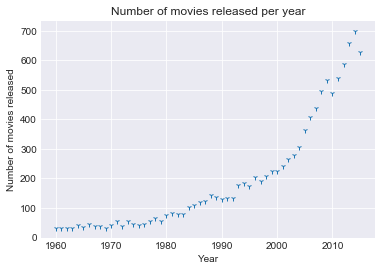

In [10]:
plt.plot(df['release_year'].value_counts(),'1')
plt.title('Number of movies released per year')
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.show()

<a id='q2'></a>
## Q2. Which actors have been casted most in the movies released from 1960-2015?

<b>Answer</b> : The bar plot below reveals the top 20 actors, which were casted in most number of movies over the years 1960-2015. From the plot it can be concluded that <b>Robert De Niro</b> was casted in most number of movies followed by <b>Samuel L. Jackson</b>.

In [25]:
#function to plot graphs
def plot_most(col):
    array = df[col].str.cat(sep = '|').split('|')
    series = pd.Series.from_array(array)
    series.value_counts().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(8,6))

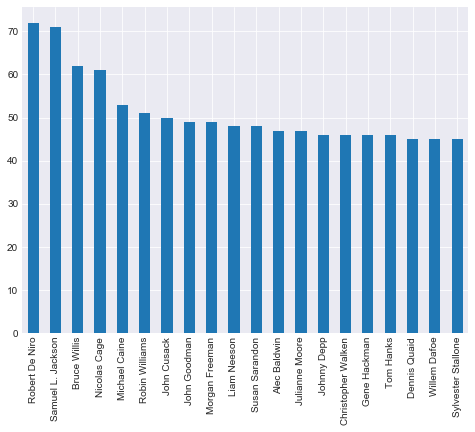

In [26]:
#Analyzing Star Cast over the years
plot_most('cast')

<a id='q3'></a>
## Q3. Which directors have directed the most number of movies released from 1960-2015?

<b>Answer</b> : The bar plot below reveals the top 20 directors, which directed most number of movies over the years 1960-2015. From the plot it can be concluded that <b>Woody Allen</b> directed most number of movies followed by <b>Clint Eastwood</b>.

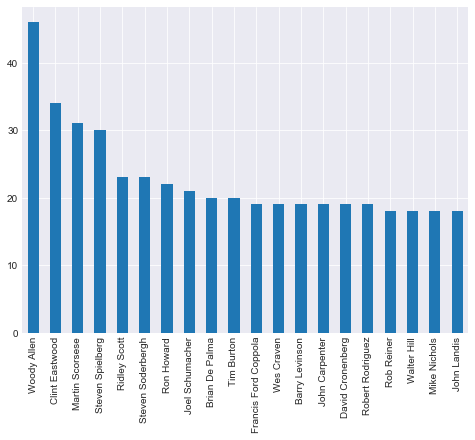

In [27]:
#Analyzing the movie directors over the years
plot_most('director')

<a id='q4'></a>
## Q4. What has been the trend of movie runtime over the years?

<b>Answer</b> : The below plot reveals that the average runtime of movies over the years 1960-2015 has remained almost same while maximum runtime and minimum runtime have varied overtime with maximum runtime being the most varied.

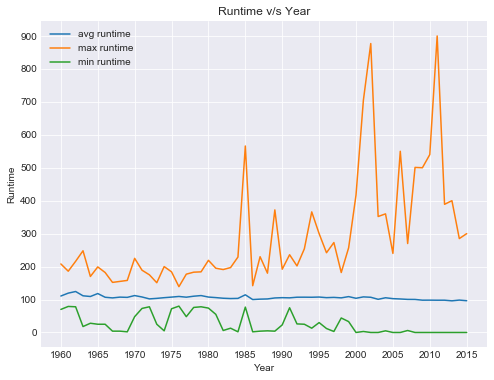

In [28]:
#Average,maximum and minimum movie runtime per year
ind_x = np.arange(1960,2016,5)
ind_y = np.arange(0,901,100)
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(df.groupby('release_year')['runtime'].mean(),label = 'avg runtime')
ax.plot(df.groupby('release_year')['runtime'].max(),label = 'max runtime')
ax.plot(df.groupby('release_year')['runtime'].min(),label = 'min runtime')
plt.legend()
plt.xticks(ind_x)
plt.yticks(ind_y)
ax.set_xlabel('Year')
ax.set_ylabel('Runtime')
plt.title('Runtime v/s Year')
plt.show()

<a id='q5'></a>
## Q5. Movies of which genre have been released over time? Also how many of movies of the top genres have released over the years 1960-2015?

<b>Answer</b> : Below is a function which takes in the name of any property of the DataFrame (df) and provides its distribution yearly. I'm using this function to get the yearly distribution of genres of movies.

In [33]:
#A function to get number of any property with respect to year
def get_numbers(col):
    df_test = df.dropna(subset=[col]) #Droping the rows where genre is NaN
    d={}
    for index,row in df_test.iterrows():
        if row.release_year not in d:
            d[row.release_year] = {}
            for item in row[col].strip().split('|'):
                if item not in d[row.release_year]:
                    d[row.release_year][item] = 1
                else:
                    d[row.release_year][item] += 1
        else:
            for item in row[col].strip().split('|'):
                if item not in d[row.release_year]:
                    d[row.release_year][item] = 1
                else:
                    d[row.release_year][item] += 1
    return d

Using the above function, i'll get data in form of a dictionary, which can be converted to a DataFrame in order to make analysis much more simpler.

In [34]:
dict_genres = get_numbers('genres') #getting the dictionary of genres info
df_genres = pd.DataFrame.from_dict(dict_genres) #Converting dictionary to DataFrame
df_genres.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,8.0,7.0,8.0,4.0,5.0,9.0,14.0,7.0,6.0,10.0,...,80,95,99,108.0,107,115,99,121.0,129.0,107.0
Adventure,5.0,6.0,7.0,7.0,5.0,6.0,11.0,7.0,5.0,5.0,...,55,60,63,72.0,59,62,50,67.0,67.0,69.0
Animation,NaN,1.0,NaN,1.0,2.0,1.0,3.0,2.0,3.0,3.0,...,39,32,33,48.0,50,46,40,42.0,36.0,39.0
Comedy,8.0,10.0,5.0,13.0,16.0,7.0,16.0,17.0,9.0,12.0,...,155,151,169,198.0,169,172,176,175.0,185.0,162.0
Crime,2.0,2.0,3.0,4.0,10.0,2.0,5.0,7.0,5.0,3.0,...,53,65,62,52.0,50,48,54,71.0,65.0,51.0


The below bar plot shows the distribution of genre of movies over the years.

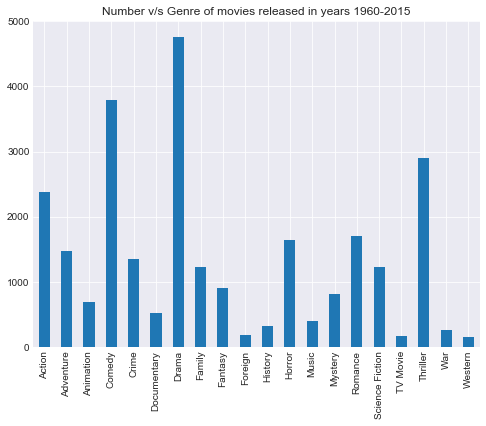

In [35]:
#Number and types of movies produced over the years 1960-2015
df_genres.sum(axis=1).plot(kind='bar',figsize=(8,6),title= 'Number v/s Genre of movies released in years 1960-2015');

Here we can see the top five famous genres over the years have been:
>   Drama, Comedy, Thriller, Action, Romance

Now,analysing their number of releases over the years

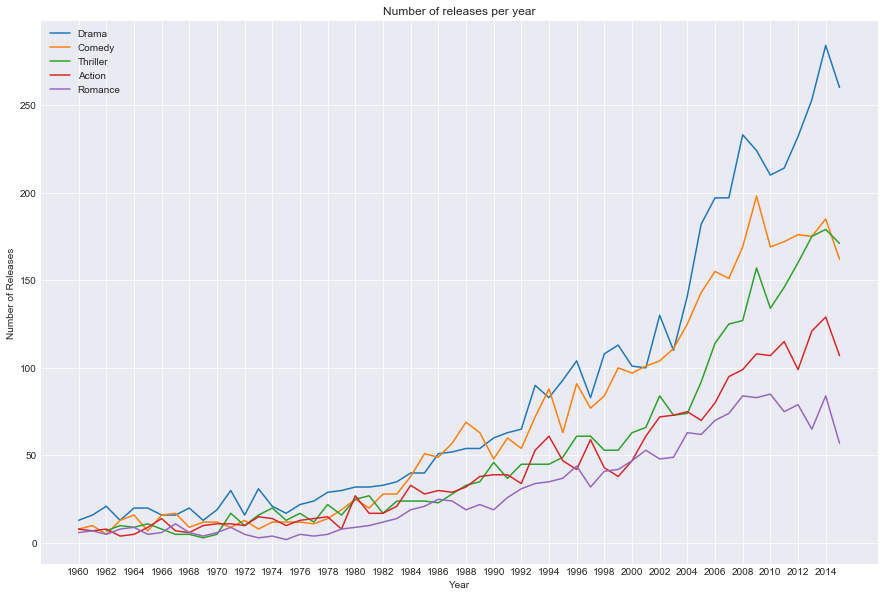

In [36]:
ind = np.arange(1960,2016,2)
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(df_genres.loc['Drama'],label='Drama')
ax.plot(df_genres.loc['Comedy'],label='Comedy')
ax.plot(df_genres.loc['Thriller'],label='Thriller')
ax.plot(df_genres.loc['Action'],label='Action')
ax.plot(df_genres.loc['Romance'],label='Romance')
plt.xticks(ind)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Releases')
plt.title('Number of releases per year')
plt.legend()
plt.show()

It can be concluded that the number of releases for each of the top 5 genres: Drama, Comedy, Thriller, Action and Romance, has increased over the years 1960-2015.

<a id='q6'></a>
## Q6. Over the years, how have the movies performed in terms of profit?
<b>Answer</b> : We don't need the entire dataset to compute the profit and profit percentage.(Taking budget_adj and revenue_adj instead of budget and revenue).

In [37]:
#Selecting the required columns
df1 = df.loc[:,('id','imdb_id','popularity','original_title','budget_adj','revenue_adj','release_year','vote_average')]
df1.head()

,id,imdb_id,popularity,original_title,budget_adj,revenue_adj,release_year,vote_average
0,135397,tt0369610,32.985763,Jurassic World,1.379999e+08,1.392446e+09,2015,6.5
1,76341,tt1392190,28.419936,Mad Max: Fury Road,1.379999e+08,3.481613e+08,2015,7.1
2,262500,tt2908446,13.112507,Insurgent,1.012000e+08,2.716190e+08,2015,6.3
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,1.839999e+08,1.902723e+09,2015,7.5
4,168259,tt2820852,9.335014,Furious 7,1.747999e+08,1.385749e+09,2015,7.3


After selecting the required columns, it is essential to check if all the null values are removed.

In [38]:
#To verify if there are no null values.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
id                10865 non-null int64
imdb_id           10855 non-null object
popularity        10865 non-null float64
original_title    10865 non-null object
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
release_year      10865 non-null int64
vote_average      10865 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.1+ MB


Even though there are no null values, but we need to remove rows with budget or revenue equal to 0 as these will behave as outliers and give incorrect analysis.

In [39]:
df1.drop(df[(df['revenue_adj'] == 0) | (df['budget_adj'] == 0)].index,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
id                3854 non-null int64
imdb_id           3854 non-null object
popularity        3854 non-null float64
original_title    3854 non-null object
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
release_year      3854 non-null int64
vote_average      3854 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 271.0+ KB


In order to analyse the profit/loss of a movie, i have added two new columns namely: <b>p&l</b> and <b>p&l%</b>

>    <b>Movie Budget</b>: The total costing that the line producer, unit production manager, or filmmaker prepares for a film production.

>    <b>Movie Revenue</b>: The total money earned by a money.

<b>Movie Profit/Loss = Movie Revenue - Movie Budget</b>

<b>Movie Profit/Loss % = (Movie Profit/Loss / Movie Budget) * 100</b>

In [40]:
#Adding 2 new columns:p&l & p&l%
df1['p&l'] = df1['revenue_adj'] - df1['budget_adj']
df1['p&l%'] = (df1['p&l']/df1['budget_adj'])*100
df1.describe()

,id,popularity,budget_adj,revenue_adj,release_year,vote_average,p&l,p&l%
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,4.423999e+07,1.370647e+08,2001.261028,6.168163,9.282470e+07,2.970412e+04
std,67222.527399,1.475162,4.480925e+07,2.161114e+08,11.282575,0.794920,1.940715e+08,1.644256e+06
min,5.000000,0.001117,9.693980e-01,2.370705e+00,1960.000000,2.200000,-4.139124e+08,-9.999998e+01
25%,6073.500000,0.462368,1.309053e+07,1.835735e+07,1995.000000,5.700000,-1.504995e+06,-1.234118e+01
50%,11321.500000,0.797511,3.001611e+07,6.173068e+07,2004.000000,6.200000,2.737064e+07,1.119690e+02
75%,38573.250000,1.368324,6.061307e+07,1.632577e+08,2010.000000,6.700000,1.074548e+08,3.210444e+02
max,417859.000000,32.985763,4.250000e+08,2.827124e+09,2015.000000,8.400000,2.750137e+09,1.018618e+08


The below plot shows how profit/loss percentage has varied over the years. Looking at the graph it can be stated that the min, max and avg profit/loss% has remained approximately similar over the years. Just for year 1986, the max p&l% is of pretty high magnitude. 

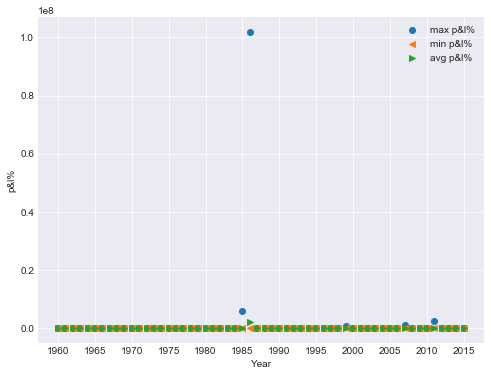

In [41]:
ind = np.arange(1960,2016,5)
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df1.groupby('release_year')['p&l%'].max(),'o',label='max p&l%')
ax.plot(df1.groupby('release_year')['p&l%'].min(),'<',label='min p&l%')
ax.plot(df1.groupby('release_year')['p&l%'].mean(),'>',label='avg p&l%')
plt.xticks(ind)
ax.set_ylabel('p&l%')
ax.set_xlabel('Year')
plt.legend()
plt.show()

The below plot reveals how the values: avg. budget, avg.revenue and avg. profit/loss, have varied over the years.

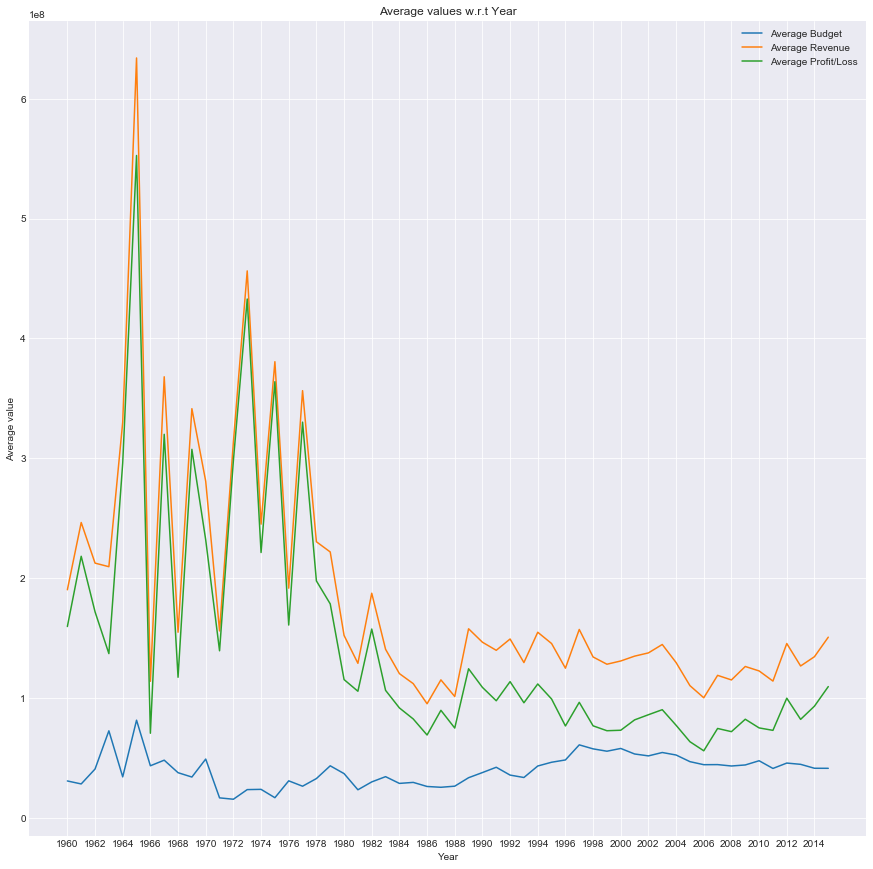

In [42]:
fig,ax = plt.subplots(figsize=(15,15)) 
ind = np.arange(1960,2016,2)#Years are from 1960-2015
ax.plot(df1.groupby('release_year')['budget_adj'].mean(),label = 'Average Budget')
ax.plot(df1.groupby('release_year')['revenue_adj'].mean(),label = 'Average Revenue')
ax.plot(df1.groupby('release_year')['p&l'].mean(),label = 'Average Profit/Loss')
ax.set_xlabel('Year')
ax.set_ylabel('Average value')
plt.title('Average values w.r.t Year')
plt.xticks(ind)
plt.legend()
plt.show()

<a id='q7'></a>
## Q7. Is there any relationship between the popularity of a movie and it's Budget, Revenue or Profit/Loss?
<b>Answer</b> : Clearly, there seems to be some correlation between popularity of a movie and it's budget,revenue or profit/loss earned by the movie. We can analyse further by computing the correlation coefficient. 

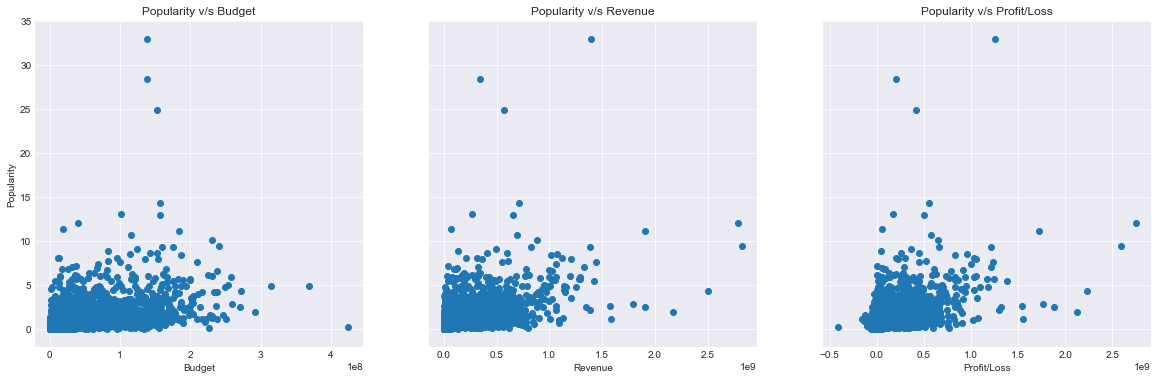

In [43]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(20,6))
ax1.scatter(df1['budget_adj'],df1['popularity'])
ax1.set_title('Popularity v/s Budget')
ax1.set_xlabel('Budget')
ax1.set_ylabel('Popularity')
ax2.scatter(df1['revenue_adj'],df1['popularity'])
ax2.set_title('Popularity v/s Revenue')
ax2.set_xlabel('Revenue')
ax3.scatter(df1['p&l'],df1['popularity'])
ax3.set_title('Popularity v/s Profit/Loss')
ax3.set_xlabel('Profit/Loss')
plt.show()

Scatter plots are a great way to see correlation between two variables but to exactly find out how the variables are correlated it's always better to compute the correlation coefficient between them.

<a id='corr'></a>
> <b>What is correlation coefficient?</b>

> Correlation between sets of data is a measure of how well they are related. The most common measure of correlation in stats is the Pearson Correlation. The full name is the Pearson Product Moment Correlation or PPMC. It shows the linear relationship between two sets of data. In simple terms, it answers the question, Can I draw a line graph to represent the data?

> The results will be between -1 and 1. You will very rarely see 0, -1 or 1. You’ll get a number somewhere in between those values. The closer the value of r gets to zero, the greater the variation the data points are around the line of best fit.

><b>High correlation</b>: .5 to 1.0 or -0.5 to 1.0.

><b>Medium correlation</b>: .3 to .5 or -0.3 to .5.

><b>Low correlation</b>: .1 to .3 or -0.1 to -0.3.

In [44]:
#using df.corr() to compute the pearson(standard) correlation coefficient
df1.loc[:,['popularity','budget_adj','revenue_adj','p&l']].corr().head(1)

,popularity,budget_adj,revenue_adj,p&l
popularity,1.0,0.399356,0.546959,0.516868


Looking at the above values, it can be concluded that popuarity is positively correlated with all three: budget, revenue and profit/loss.
Popularity has high correlation with revenue and profit/loss earned by a movie while, popularity has a medium correlation with budget of a movie.

<a id='q8'></a>
## Q8. Is there any relationship between the rating of a movie and it's Budget, Revenue or Profit/Loss?
<b>Answer</b> : Clearly, there seems to be some correlation between Rating(vote_average) of a movie and it's budget,revenue or profit/loss earned by the movie. We can analyse further by computing the correlation coefficient. 

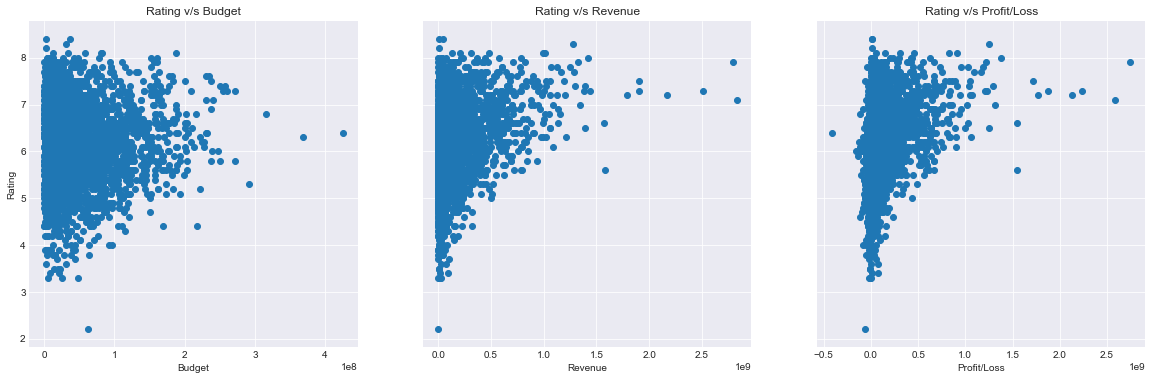

In [45]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(20,6))
ax1.scatter(df1['budget_adj'],df1['vote_average'])
ax1.set_title('Rating v/s Budget')
ax1.set_xlabel('Budget')
ax1.set_ylabel('Rating')
ax2.scatter(df1['revenue_adj'],df1['vote_average'])
ax2.set_title('Rating v/s Revenue')
ax2.set_xlabel('Revenue')
ax3.scatter(df1['p&l'],df1['vote_average'])
ax3.set_title('Rating v/s Profit/Loss')
ax3.set_xlabel('Profit/Loss')
plt.show()

Now finding the correlation coefficient.

In [46]:
df1.loc[:,['vote_average','budget_adj','revenue_adj','p&l']].corr().head(1)

,vote_average,budget_adj,revenue_adj,p&l
vote_average,1.0,0.036803,0.266844,0.288651


Looking at the above values, it can be concluded that movie rating is positively correlated with all three: budget, revenue and profit/loss.
Movie rating has medium correlation with all the three variables.

<a id = 'conc'></a>
## Conclusion

In this project I tried to provide useful insights using pandas, numpy and matplotlib on a TMDb movie dataset containing information of over 10,000 movies.<br>
I was able to provide deatils about:-<br>
>- Movie release trend<br>
- Top actors<br>
- Top Directors<br>
- Movie Runtime Trend<br>
- Genre Analysis<br>
- Profit/loss Analysis<br>
- Popularity characteristics<br>
- Ratings characteristics<br>

<b>Many more questions like following can be asked</b>:-<br>
>- Which actor-director pair has been the most successfull over the years?<br>
- Which production house has earned the most profit/loss over the years?<br>
- How many movies have been based on novels over the years?<br>

<b>Limitations/Challenges faced during the project:-</b>
>- In the genre analysis a movie's genre was taken multiple times into consideration as a movie could belong to both comedy and drama genres, so it should be consired only once, but in which genre to consider it.So, during the analysis the movie is counted multiple times(+1 for comedy and +1 for drama).<br>
- The values for the homepage of a movie are missing for about 80% of the total records. So, the homepage column is kind of redundent data. Otherwise, it could have been used along with beautiful soup to extract useful information from the movie's homepage.<br>
- Performance of a movie could have analysed in a much better way if we could get the access to the number of screens the movie was released or the reviews of the movie.<br>
- For the profit/loss analysis for a movie, i took profit/loss as the difference between the revenue and the budget. The analysis would have been much more insightful, if the dataset provided details of all the costs beared during the production of the movie and even the advestising or marketing costs.